In [ ]:
import pandas as pd
import random
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot, scatter, plot, axis
from scipy.stats import linregress
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objs as go
import scipy.stats as stats
import statsmodels.api as sm
pd.set_option("display.notebook_repr_html", False)
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 110)
pd.set_option("precision", 3)
pd.set_option("max_rows", 100)
pd.set_option("min_rows", 90)

%matplotlib inline

In [ ]:
def Weight_Lagrange_Multipliers(Expected_return):
    
    def Lambda_Cov_R(Expected_return):

        Lambda = np.divide( np.subtract( Delta.dot(Expected_return) , alpha ), np.subtract(zeta.dot(Delta),np.square(alpha)))
        Lambda_Cov_R_value  = np.multiply(Lambda,Covmatrix_inverse).dot(R_array)
        return (Lambda_Cov_R_value)

    def Second_Cov_R(Expected_return):
        y= np.divide(np.subtract(zeta,np.multiply(alpha,(0.02))),np.subtract (zeta.dot(Delta),np.square(alpha)))
        Second_Cov_R_value = np.multiply(y,Covmatrix_inverse).dot(e)
        return (Second_Cov_R_value)
    
    def weight(Expected_return):      
        
        Optimal_weight = pd.DataFrame(np.add(Lambda_Cov_R(Expected_return),Second_Cov_R(Expected_return)))
        return (Optimal_weight)
     
   
    weight(Expected_return)
    
    return np.add(Lambda_Cov_R(Expected_return),Second_Cov_R(Expected_return))


def Value_a(zeta,Covmatrix_inverse,e,alpha,R_array,Delta):
    return np.divide( np.multiply(zeta,Covmatrix_inverse).dot(e) - ( np.multiply(alpha,Covmatrix_inverse).dot(R_array)) ,np.subtract(np.multiply(zeta,Delta),np.square(alpha)) )


def Value_b(zeta,Covmatrix_inverse,e,alpha,R_array,Delta):
    return np.divide( np.multiply(Delta,Covmatrix_inverse).dot(R_array) - ( np.multiply(alpha,Covmatrix_inverse).dot(e)),np.subtract(np.multiply(zeta,Delta),np.square(alpha)) )


def Optimal_Portfolio_weight_a_b(zeta,Covmatrix_inverse,e,alpha,R_array,Delta,Expected_return):
    
    return np.add(Value_a(zeta,Covmatrix_inverse,e,alpha,R_array,Delta),(Value_b(zeta,Covmatrix_inverse,e,alpha,R_array,Delta)).dot(Expected_return))


def Sharpe_Ratio(Expected_Portfolio_Return,Riskfree_rate):
    
    return np.sqrt(zeta - 2*alpha*Riskfree_rate + Delta*np.square(Riskfree_rate))

def Lagrange_multiplier_withriskfree(Expected_Portfolio_Return,Riskfree_rate):
    alpha = (R_array.T).dot(Covmatrix_inverse).dot(np.array(e))
    zeta = R_array_Tran.dot(Covmatrix_inverse).dot(R_array)
    Delta = e_Tran.dot(Covmatrix_inverse).dot(np.array(e))
    return (Expected_Portfolio_Return - Riskfree_rate)/(zeta - 2*alpha*Riskfree_rate + Delta * np.square(Riskfree_rate))

def Std_deviation_Portfolio_with_RiskfreeAsset(Expected_Portfolio_Return,Risk_Free_Asset):
    ##(2 - 0.10)/np.sqrt(zeta - 2*alpha*0.13+Delta*np.square(0.13))
    return float((Expected_Portfolio_Return - Risk_Free_Asset)/(np.sqrt(zeta - 2*alpha*Risk_Free_Asset+Delta*np.square(Risk_Free_Asset))).astype(float))


In [ ]:
"""Assignment 1 : Mean Variance -Analysis"""
"A. Data Load"
data  = pd.read_csv("Industry_Portfolios.csv")
"B.Data Changes"
data.isnull().sum()
data["Date"] = pd.to_datetime(data['Date'],format='%Y%m')
df  = data.copy()
df.set_index( "Date", inplace =True)

"C. Matrix creation "

"1. Covaraince Matrix"
df_cov = df.cov()
df_cov_array = np.array(df_cov)
Covmatrix_inverse = np.array(np.linalg.inv(np.array(df_cov)))
Covmatrix_array = np.array(df_cov)
Covmatrix_inverse = np.linalg.inv(Covmatrix_array) 

"2. Std.Deviation , Mean, e"
R = pd.DataFrame(df.mean())
R_array = np.array(R)
R_array_Tran = np.array(R).T
Covmatrix = df.cov()
Covmatrix_array = np.array(Covmatrix)
Covmatrix_inverse = np.linalg.inv(Covmatrix_array)

e = pd.DataFrame([1] * len( df.columns))
e  = np.array(e)


## Economic Frontier without riskless asset
"Given Data:"
Expected__Mean_Vertical_axis  = pd.DataFrame( np.arange(0,2,0.01))
risk_free_rate = 0.13

"Alpha Zeta and delta"
alpha = (R_array.T).dot(Covmatrix_inverse).dot(np.array(e))

zeta = R_array_Tran.dot(Covmatrix_inverse).dot(R_array)
e_Tran = np.array(e).T
Delta = e_Tran.dot(Covmatrix_inverse).dot(np.array(e))

"Global Minimum Variance Portfolio expected return"
RMV = alpha / Delta

"Weight Calculation using Lagrange Multiplie and a/b " 
#Expected_Return = 0.02
#Weight_a_b = Optimal_Portfolio_weight_a_b(zeta,Covmatrix_inverse,e,alpha,R_array,Delta,Expected_Return)
#Weight_Lagrange_Multipliers = Weight_Lagrange_Multipliers(Expected_Return)
#Weight_Lagrange_Multipliers
df_exp_front  = pd.DataFrame( np.arange(0,2,0.01))

"Efficient Frontier with Variance witout RMV"

df_exp_front.rename ( columns = {0 :"Exp_Return"}, inplace = True)
df_exp_front["Exp_Return_Variance"] = pd.DataFrame(df_exp_front.Exp_Return.apply( lambda x : float((Weight_Lagrange_Multipliers(x).T).dot(Covmatrix_array).dot(Weight_Lagrange_Multipliers(x)).astype(float)) ))

"Minimum Variance Frontier  - RMV "
df_exp_front["Exp_Return_var_Rmv"] = df_exp_front["Exp_Return"].apply(lambda x : float(((1/Delta) + (( Delta /(zeta*Delta -np.square(alpha))* np.square(x  - (alpha/Delta))))).astype(float)))
#plt.plot(df_exp_front["Exp_Return_var_dev_Rmv"],df_exp_front["Exp_Return"])

"Minimum Variance Frontier with Std Deviation - RMV "
df_exp_front["Exp_Return_Std_dev_Rmv"] = df_exp_front["Exp_Return"].apply(lambda x : float(np.sqrt((1/Delta) + (( Delta /(zeta*Delta -np.square(alpha))* np.square(x  - (alpha/Delta))))).astype(float)))
#plt.plot(df_exp_front["Exp_Return_Std_dev_Rmv"],df_exp_front["Exp_Return"],label="Without Riskless Asset", color ="blue")

## Economic Frontier WITH riskless asset
"Given Data:"
Expected__Mean_Vertical_axis  = pd.DataFrame( np.arange(0,2,0.01))
risk_free_rate = 0.13
Risk_Free__Rate = 0.13
rmv = alpha / Delta
df_exp_front["Exp_Return_var_rmv_withRiskFree"] = df_exp_front["Exp_Return"].apply(lambda x : float( np.square(x - risk_free_rate) / ( zeta - 2 * alpha *risk_free_rate + Delta * np.square(risk_free_rate)  ) ))
df_exp_front["Exp_Return_std_dev_Rmv_withRiskFree"] = df_exp_front["Exp_Return"].apply(lambda x : float( np.sqrt(np.square(x - risk_free_rate) / ( zeta - 2 * alpha *risk_free_rate + Delta * np.square(risk_free_rate)))))
#plt.plot(df_exp_front["Exp_Return_std_dev_Rmv_withRiskFree"],df_exp_front["Exp_Return"],label="With Riskless Asset", color ="green")


### Tangency Portfolio  ###
Expected_return_Tangency_portfolio = ( alpha * risk_free_rate - zeta) / ( Delta * risk_free_rate - alpha)
Risk_premium = -(zeta - 2 * alpha * risk_free_rate + Delta * risk_free_rate**2)/ (Delta * (risk_free_rate - rmv ))
Std_deviation = -np.sqrt(zeta - 2 * alpha * risk_free_rate + Delta * risk_free_rate **2)/( Delta * ( risk_free_rate - rmv))
Sharp_ratio =  np.sqrt(zeta - 2 * alpha * risk_free_rate + Delta * Risk_Free__Rate ** 2)
lambda_Risk_Free_Asset = (Expected_return_Tangency_portfolio - risk_free_rate)/(zeta - 2 * alpha * risk_free_rate + Delta * ( risk_free_rate ** 2))
Weight_Portfolio_riskFreeAsset = ((lambda_Risk_Free_Asset *Covmatrix_inverse).dot(R_array -  0.13 * e  ))

#plt.scatter(Std_deviation,Expected_return_Tangency_portfolio,label="Tangent Portfolio", color ="red", marker ="x")

### expected return on investor portfolio  - Capital Market Line
risk_free_rate
Weight_Portfolio_riskFreeAsset
df_exp_front["Exp_Return_Investor_portfolio"]= df_exp_front["Exp_Return"].apply( lambda x : np.round(risk_free_rate + Weight_Portfolio_riskFreeAsset.T @ (x - risk_free_rate *e),2))

### Alternate Calculation of CML  using akpha , delta 
a = df_exp_front["Exp_Return_std_dev_Rmv_withRiskFree"].apply( lambda x : (risk_free_rate) + np.sqrt( zeta - 2* alpha * risk_free_rate + Delta * np.square(risk_free_rate)) * x )
#plt.scatter(df_exp_front["Exp_Return_std_dev_Rmv_withRiskFree"],a )



### Graph
plt.figure(figsize = (20,10))
plt.xlabel("Standard Deviation",fontsize =20)
plt.ylabel("Expected Return",fontsize =20)

#plt.xlim(0,5)
#plt.xticks(np.arange(0,6, 0.5),fontsize=20)
#plt.yticks(np.arange(0,2.5, 0.5),fontsize=20)

### withoutriskless portfolio
plt.plot(df_exp_front["Exp_Return_Std_dev_Rmv"],df_exp_front["Exp_Return"],label="Without Riskless Asset", color ="blue", linewidth = 5)
## With RiskLess Portfolio
#plt.plot(df_exp_front["Exp_Return_std_dev_Rmv_withRiskFree"],df_exp_front["Exp_Return"],label="With Riskless Asset", color ="green",linewidth = 5)
## Tangent portfolio
plt.scatter(Std_deviation,Expected_return_Tangency_portfolio,label="Tangent Portfolio", color ="red", marker ="x",linewidth = 40)
plt.grid()
plt.title("Efficient Frontier",fontsize=30,fontweight="bold")
plt.scatter(df_exp_front["Exp_Return_std_dev_Rmv_withRiskFree"],a , color ="purple",linewidth = 5,label="With Riskless Asset - CML - using Alpha and Beta")
plt.legend(fontsize =20)

In [ ]:
"Slope on Frontier for different std deviation and returns"
df_exp_front["Slope"] = df_exp_front.apply( lambda x : float((np.divide(( zeta.dot(Delta) - np.square( alpha )),Delta * ( x["Exp_Return"] - alpha/Delta)).dot(x["Exp_Return_Std_dev_Rmv"])).astype(float)), axis=1 ) 

In [5]:
# Session 3 : Security Market Line
"Given :"
risk_free_rate = 0.13
Rf = 0.13
"Find : alpha and Beta of each industry portfolio"

'Find : alpha and Beta of each industry portfolio'

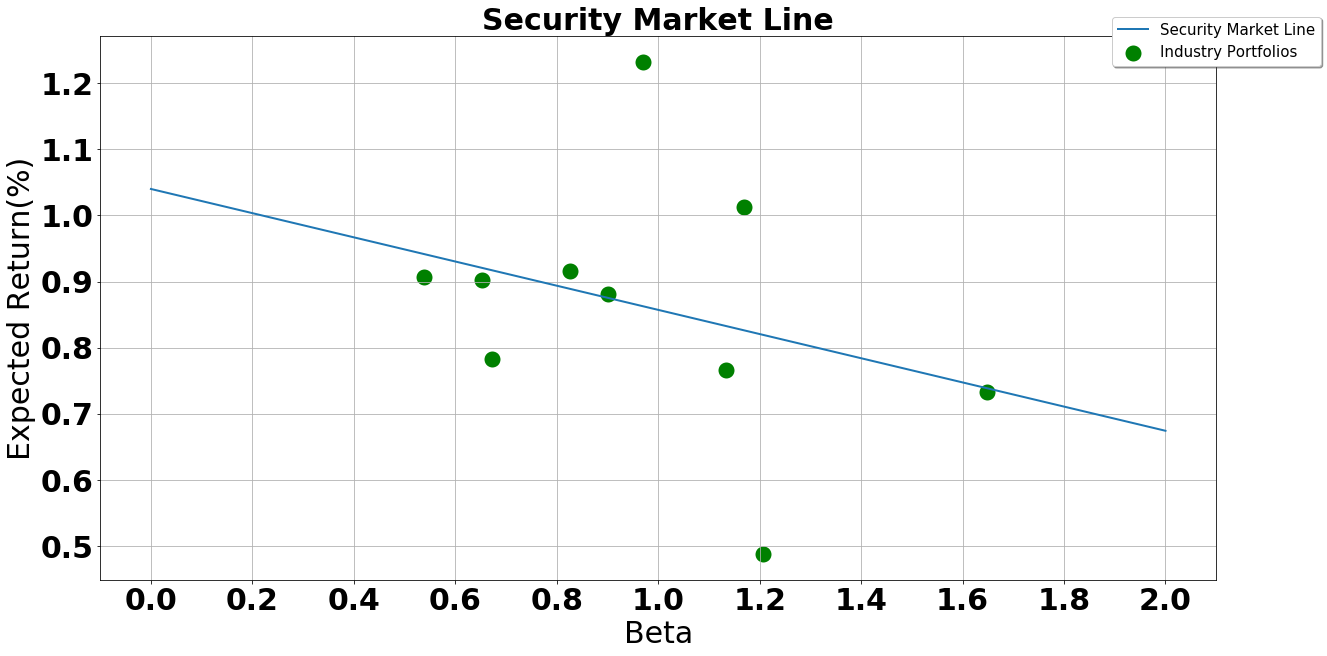

In [6]:
## Data Load 
data = pd.read_csv("Industry_Portfolios.csv")
data_indus_Portfolio  = data
df_market_Portfolio = pd.read_csv("Market_Portfolio.csv")

##
data_indus_Portfolio.set_index( "Date", inplace =True)
df_market_Portfolio.set_index( "Date", inplace =True)
risk_free_rate = 0.13

## Mean 
R = pd.DataFrame(data_indus_Portfolio.mean())
R_array = np.array(R)
e = pd.DataFrame([1] * len( data_indus_Portfolio))
e  = np.array(e)
Market_Portfolio_mean = df_market_Portfolio.mean()

### Estimate intercept coefficeint and slope  
##coefficient for each of the ten insudtry portfolios
df_market_Portfolio[ "Market_Risk_Premium" ] =  df_market_Portfolio[ "Market"] - risk_free_rate


data_indus_Portfolio_premium = np.subtract(data_indus_Portfolio , Rf * e)
data_indus_Portfolio_premium
intercept_Slope  = []
for i in data_indus_Portfolio_premium.columns:
    test = pd.concat([df_market_Portfolio["Market_Risk_Premium"],data_indus_Portfolio_premium[i]], axis=1)
    test = test.astype("Float64")
    c = test.columns[1]
    slope, intercept, r_value, p_value, std_err = stats.linregress(test["Market_Risk_Premium"], test[i])
    intercept_Slope.append([i,intercept, slope])

df = pd.DataFrame(intercept_Slope, columns = ["Domain","Intercept","Beta"])
df = pd.concat([df.reset_index(),R.reset_index()],axis =1).drop(columns = {"index"}).rename( columns = {0:"Mean"} )

## Security Market Line 
## Portfolios above SML are underpriced 

slope, intercept, r_value, p_value, std_err = stats.linregress(df["Beta"],df["Mean"])
SML = slope *2 + intercept
x_axis = [0,2]
y_axis = [intercept,SML]

## Graph 
plt.figure(figsize = (20,10))
plt.xlabel("Beta",fontsize =30)
plt.ylabel("Expected Return(%)",fontsize =30)
#plt.xlim(0,5)
plt.xticks(np.arange(0,2.1, 0.2),fontsize=30,weight='bold')
plt.yticks(np.arange(0,1.5, 0.1),fontsize=30,weight='bold')
plt.title("Security Market Line",fontsize=30,fontweight="bold")


plt.plot(x_axis, y_axis,linewidth = 2 , label = "Security Market Line")
plt.scatter(df["Beta"],df["Mean"],label="Industry Portfolios", color ="green", marker ="o",linewidth = 10)
plt.legend(loc='upper center', bbox_to_anchor=(1, 1.05),
          ncol=1, fancybox=True, shadow=True,fontsize =15)
plt.grid()

In [ ]:
## Session Linear Factors Models

In [26]:
"Load Data "
df_risk_factors = pd.read_csv("Risk_Factors.csv")
df_market_Portfolio = pd.read_csv("Market_Portfolio.csv")
data_indus_Portfolio  = pd.read_csv("Industry_Portfolios.csv")

df_risk_factors.head(10)
df_risk_factors.set_index("Date",inplace = True)
df_market_Portfolio.set_index("Date",inplace = True)
data_indus_Portfolio.set_index("Date",inplace = True)

## Concatenate - df_market_Portfolio,df_market_Portfolio and data_indus_Portfolio
df_ = pd.concat([data_indus_Portfolio,df_market_Portfolio,df_risk_factors],axis =1)
df_1 = df_.copy()

## Return premium and risk premium
df_2 = np.subtract(df_1.loc[:,"NoDur":"Market"], pd.DataFrame(df_1["Market"]))

## Ratios
Treynor_ratio = []
Sharpe_ratio1  = []
Sortino_ratio = []
Alpha_ratio = []
Factor_ratio = []
Rm_Rf = df_["Rm-Rf"]

for i in df_.loc[:,"NoDur":"Other"].columns:
     Beta = (df_[i ].cov(df_1["Market"]))/np.square(df_1["Market"].std()).mean()
     ratio = df_2[i].mean()/Beta
     Treynor_ratio.append((ratio,i))
     "Sharpe Ratio"
     M = df_[i ].mean()
     ratio = df_2[i].mean()/df_1[i].std()
     Sharpe_ratio1.append((ratio,i))
     "Alpha Ratio"   
     Beta = (df_[i ].cov(df_1["Market"]))/np.square(df_1["Market"].std()).mean()
     difference = df_2[i].mean() - df_2["Market"].mean() * Beta
     Alpha_ratio.append((i,difference))
     "Sortino Ratio"
     Downside_risk2 = df_2[i].apply( lambda x : 0 if x > 0 else x**2 )
     Downside_risk_std = np.sqrt(Downside_risk2.mean())
     ratio = df_2[i].mean() / Downside_risk_std
     Sortino_ratio.append((i,ratio))
     "Factor Ratio"
     placeholder2 = df_.loc[:,i] - df_["Rf"]
     model = sm.formula.ols(formula = "placeholder2 ~ Rm_Rf +SMB+HML", data = df_).fit()
     Factor_ratio.append([model.params[0],i])



Treynor_ratio = pd.DataFrame(Treynor_ratio,columns = {"Sector","Treynor_Ratio"});Treynor_ratio.set_index("Sector",inplace = True)
Sharpe_ratio = pd.DataFrame(Sharpe_ratio1,columns = {"Sector","Sharpe_Ratio"});Sharpe_ratio.set_index("Sector",inplace = True)
Alpha_ratio = pd.DataFrame(Alpha_ratio,columns = {"Sector","Alpha_ratio"});Alpha_ratio.set_index("Sector",inplace = True)
Sortino_ratio = pd.DataFrame(Sortino_ratio,columns = {"Sortino_ratio","Sector"});Sortino_ratio.set_index("Sector",inplace = True)
#Factor_ratio = pd.DataFrame(Factor_ratio,columns = {"Sector","3FA"}) ;Factor_ratio.set_index("Sector", inplace = True) 

Performance_metrics = pd.concat( [Treynor_ratio,Alpha_ratio,Sharpe_ratio],axis =1 )

In [ ]:
## Graph - Historgram 
"""
plt.figure(figsize = (20,10))
plt.xlabel("Sector",fontsize =30)
plt.ylabel("Ratio",fontsize =30)
plt.yticks(np.arange(0,4, 0.1),fontsize=30,weight='bold')
plt.xticks(fontsize=30,weight='bold',rotation = 70, color = "blue")
plt.title("Treynor_Ratio",fontsize=30,fontweight="bold")
#plt.bar(Performance_metrics.index,Performance_metrics["Treynor_Ratio"], color = "green")
#plt.grid()


## Graph - Historgram 

plt.figure(figsize = (20,10))
plt.xlabel("Sector",fontsize =30)
plt.ylabel("Ratio",fontsize =30)
plt.yticks(np.arange(0,4, 0.1),fontsize=30,weight='bold')
plt.xticks(fontsize=30,weight='bold',rotation = 70, color = "blue")
plt.title("Sharpe_Ratio",fontsize=30,fontweight="bold")
#plt.bar(Performance_metrics.index,Performance_metrics["Sharpe_Ratio"], color = "pink")
#plt.grid()

plt.figure(figsize = (20,10))
plt.xlabel("Sector",fontsize =30)
plt.ylabel("Ratio",fontsize =30)
plt.yticks(np.arange(0,4, 0.1),fontsize=30,weight='bold')
plt.xticks(fontsize=30,weight='bold',rotation = 70, color = "blue")
plt.title("3FA",fontsize=30,fontweight="bold")
#plt.bar(Performance_metrics.index,Performance_metrics["3FA"], color = "yellow")
#plt.grid()


plt.figure(figsize = (20,10))
plt.xlabel("Sector",fontsize =30)
plt.ylabel("Ratio",fontsize =30)
plt.yticks(np.arange(0,4, 0.1),fontsize=30,weight='bold')
plt.xticks(fontsize=30,weight='bold',rotation = 70, color = "blue")
plt.title("Alpha_ratio",fontsize=30,fontweight="bold")
plt.bar(Performance_metrics.index,Performance_metrics["Alpha_ratio"], color = "yellow")#plt.grid()
"""
## Efficient Frontier - with not short position 
weights = []
mean_return = []
variance = []
mean_returns = data_indus_Portfolio.mean()
mean_returns_array = np.array(mean_returns)
cov_matrix = data_indus_Portfolio.cov()
for i in np.arange(1,1000000,1):
    rand_Num  = (np.array(np.random.uniform(1,0,10)))
    x = rand_Num /np.sum(rand_Num)
    weights.append(x)
    mean_return.append(x.dot(mean_returns_array.T))
    variance.append((x) @(cov_matrix) @ x.T)

df_3 = pd.DataFrame( [ mean_return, np.sqrt(variance)])
df_3 = df_3.T
df_3.rename ( columns = {0:"Mean",1:"St_dev"},inplace = True)

In [ ]:
Performance_metrics

In [ ]:
## Efficient Frontier - 

mean_returns = data_indus_Portfolio.mean()
mean_returns_array = np.array(mean_returns)
mean_returns_array.transpose()
cov_matrix = data_indus_Portfolio.cov()

df_3 = pd.DataFrame( [ mean_return, np.sqrt(variance)])
df_3 = df_3.T
df_3.rename ( columns = {0:"Mean",1:"St_dev"},inplace = True)

weights = []
mean_return = []
variance = []
mean_returns = data_indus_Portfolio.mean()
mean_returns_array = np.array(mean_returns)
cov_matrix = data_indus_Portfolio.cov()
for i in np.arange(1,1000000,1):
    rand_Num  = (np.array(np.random.uniform(1,0,10)))
    x = rand_Num /np.sum(rand_Num)
    weights.append(x)
    mean_return.append(x.dot(mean_returns_array.T))
    variance.append((x) @(cov_matrix) @ x.T)

df_3 = pd.DataFrame( [ mean_return, np.sqrt(variance)])
df_3 = df_3.T
df_3.rename ( columns = {0:"Mean",1:"St_dev"},inplace = True)


import seaborn as sns
plt.style.use('seaborn')
plt.figure( figsize =  (30,20) )
plt.scatter( x='St_dev', y='Mean',data=df_3,cmap='black', edgecolors='red',s=500,alpha = 0.75)
plt.xticks(fontsize=16)
plt.xlabel("Standard-Deviation",fontsize=30)
plt.ylabel("Expected Return",fontsize=30)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title("Efficient Fontier ",fontsize=30)

### Efficient Frontier with weight 1/w 
weights = []
mean_returns = []
var = []
for i in np.arange(1,1000000,1):
    rand_Num  = 1/(np.array(np.random.uniform(1,0,10)))
    x = rand_Num /np.sum(rand_Num)
    weights.append(x)
    mean_returns.append(x.dot(mean_returns_array.T))
    var.append((x) @(cov_matrix) @ x.T)

df_efficient_frontier = pd.DataFrame( [ mean_returns, var])
df_efficient_frontier = df_efficient_frontier.T
df_efficient_frontier.rename ( columns = {0:"Mean",1:"Variance"},inplace = True)
df_efficient_frontier["St_dev"] = np.sqrt(df_efficient_frontier["Variance"])

plt.style.use('seaborn')
plt.figure( figsize =  (30,20) )
plt.scatter( x='St_dev', y='Mean',data=df_efficient_frontier,cmap='black', edgecolors='red',s=500,alpha = 0.25)
plt.xticks(fontsize=16)
plt.xlabel("Standard-Deviation",fontsize=30)
plt.ylabel("Expected Return",fontsize=30)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title("Factors comparision across different sectors",fontsize=30)

In [ ]:
df_efficient_frontier

### Session 5 :  Minimum - Tracking Error Frontier 
### Stochastic Discount factor 
Discount_factor_δ =0.99
### Risk Free Rate Calculation 
\begin{equation*}
\large R_f = \large ({e}^{ρ + γμ - \frac {1}{2} γ ^2 σ ^2 })
\end{equation*}

### Hansen Jagannathan bound   
mu = Mean of pricing kernel M

\begin{equation*}
\large \frac {\sigma_m}{\mu_m} >= \frac { E(R) - R_f} {\sigma_i}
\end{equation*}


\begin{equation*}
\large \frac {\sigma_m}{\mu_m} = \gamma * \sigma_c
\end{equation*}


### Variance of pricing kernel
\begin{equation*}
\large Var[M] = \mu_m^2 -  \mu^2_m
\end{equation*}
### Pricing kernel 
\begin{equation*}
\large pricing-kernel = \delta * \exp [ - \gamma  ln ( \frac {C_1} {C_0})]
\end{equation*}

### Pricing kernel   without rare disater 
\begin{equation*}
\large pricing-kernel = \delta * \exp [ - \gamma  *   ( \frac {C_1} {C_0})]
\end{equation*}
### Pricing kernel mean  without rare disater 

\begin{equation*}
\large \mu_M = \delta * \exp [ - \gamma  * mu_c + ( \frac {1} {2} * \gamma^2 \sigma^2_c)]
\end{equation*}

### Pricing kernel mean -square  without rare disater 

\begin{equation*}
\large \mu_M^2 = \delta * \exp [ - \gamma  * mu_c * 2  + ( 2 * * \gamma^2 \sigma^2_c)]
\end{equation*}

### Pricing kernel mean -square  without rare disater 

\begin{equation*}
\mu = \delta * \exp [ - \gamma  * mu_c * 2  + ( 2 * * \gamma^2 \sigma^2_c)]
\end{equation*}

### Optimal_Consumption_growth - rare disater 

\begin{equation*}
\large OptimalConsumptionGrowth =  \mu_c + \sigma_c * z  + \nu \epsilon
\end{equation*}





/Users/ankitrawat/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


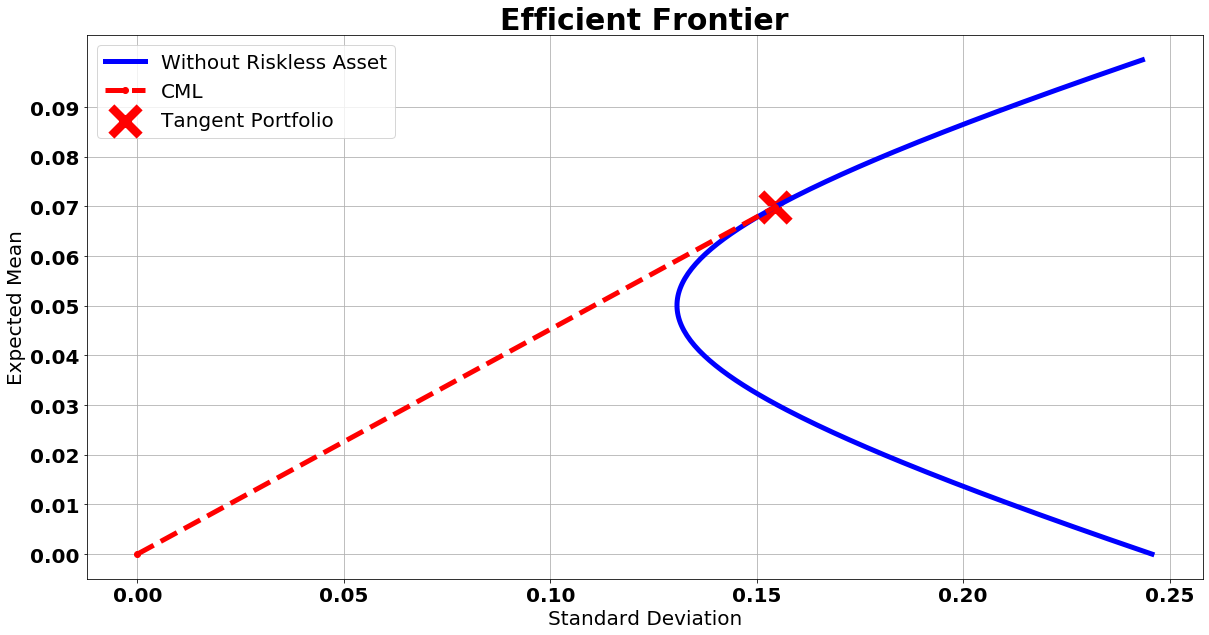

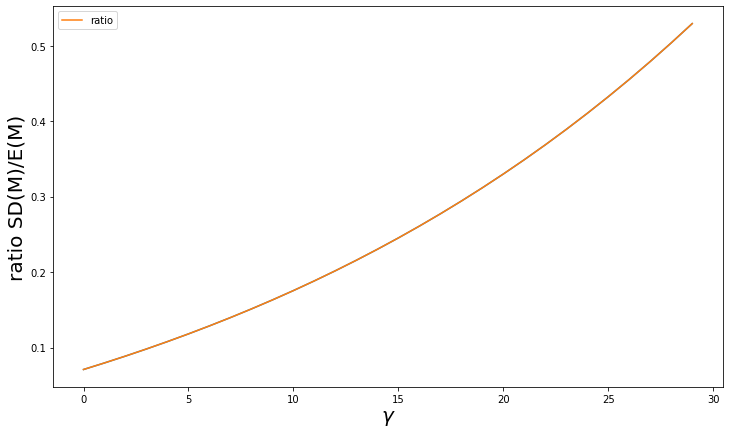

In [19]:
### Session 5 :  Minimum - Tracking Error Frontier 
"Load Data "
df_risk_factors = pd.read_csv("Risk_Factors.csv")
df_market_Portfolio = pd.read_csv("Market_Portfolio.csv")
data_indus_Portfolio  = pd.read_csv("Industry_Portfolios.csv")

df_risk_factors.head(10)
df_risk_factors.set_index("Date",inplace = True)
df_market_Portfolio.set_index("Date",inplace = True)
data_indus_Portfolio.set_index("Date",inplace = True)

## Concatenate - df_market_Portfolio,df_market_Portfolio and data_indus_Portfolio
df_ = pd.concat([data_indus_Portfolio,df_market_Portfolio,df_risk_factors],axis =1)
df_1 = df_.copy()

## Return premium and risk premium
df_ = pd.concat([data_indus_Portfolio,df_market_Portfolio],axis =1)
df  = np.subtract( df_.loc[:,"NoDur":"Other"] , pd.DataFrame(df_["Market"]))

"Covariance Matrix , std, mean, e  "
Std_Deviation = np.sqrt(np.diagonal(Covmatrix).round(2))
Covmatrix = df.cov()
Covmatrix_array = np.array(Covmatrix)
Covmatrix_inverse = np.linalg.inv(Covmatrix_array) 
R = pd.DataFrame(df.mean())
R_array = np.array(R)
e = pd.DataFrame([1] * len( df.columns))
e  = np.array(e)

"Given:"
Expected__Mean_Vertical_axis  = pd.DataFrame( np.arange(0,0.1,0.0005))
df_exp_front = Expected__Mean_Vertical_axis
df_exp_front.rename ( columns = {0 :"Exp_Return"}, inplace = True)

"Alpha, Beta  and Zeta"
alpha = (R_array.T).dot(Covmatrix_inverse).dot(np.array(e))

R_array_Tran = np.array(R).T
zeta = R_array_Tran.dot(Covmatrix_inverse).dot(R_array)

e_Tran = np.array(e).T
Delta = e_Tran.dot(Covmatrix_inverse).dot(np.array(e))

rmv = alpha / Delta

"Minimum Variance Frontier  - RMV "
df_exp_front["Exp_Return_var_Rmv"] = df_exp_front["Exp_Return"].apply(lambda x : float(((1/Delta) + (( Delta /(zeta*Delta -np.square(alpha))* np.square(x  - (alpha/Delta))))).astype(float)))

"Minimum Variance Frontier with Std Deviation - RMV "
df_exp_front["Exp_Return_Std_dev_Rmv"] = df_exp_front["Exp_Return"].apply(lambda x : float(np.sqrt((1/Delta) + (( Delta /(zeta*Delta -np.square(alpha))* np.square(x  - (alpha/Delta))))).astype(float)))


### Tangency Portfolio  ###
risk_free_rate = 0
Expected_return_Tangency_portfolio = ( alpha * risk_free_rate - zeta) / ( Delta * risk_free_rate - alpha)
Risk_premium = -(zeta - 2 * alpha * risk_free_rate + Delta * risk_free_rate**2)/ (Delta * (risk_free_rate - rmv ))
Std_deviation = -np.sqrt(zeta - 2 * alpha * risk_free_rate + Delta * risk_free_rate **2)/( Delta * ( risk_free_rate - rmv))
Sharp_ratio =  np.sqrt(zeta - 2 * alpha * risk_free_rate + Delta * Risk_Free__Rate ** 2)
lambda_Risk_Free_Asset = (Expected_return_Tangency_portfolio - risk_free_rate)/(zeta - 2 * alpha * risk_free_rate + Delta * ( risk_free_rate ** 2))
Weight_Portfolio_riskFreeAsset = ((lambda_Risk_Free_Asset *Covmatrix_inverse).dot(R_array -  risk_free_rate * e  ))
Risk_premium = -(zeta - 2 * alpha * risk_free_rate + Delta * risk_free_rate**2)/ (Delta * (risk_free_rate - rmv ))

"Information Ratio"
(Expected_return_Tangency_portfolio / Std_deviation_Portfolio_with_RiskfreeAsset(Expected_return_Tangency_portfolio,0))

### Graph
plt.figure(figsize = (20,10))
plt.xlabel("Standard Deviation",fontsize =20)
plt.ylabel("Expected Mean",fontsize =20)

#plt.xlim(0,5)
plt.xticks(np.arange(0,0.30, 0.05),fontsize=20,weight='bold')
plt.yticks(np.arange(0,0.10, 0.01),fontsize=20,weight='bold')

### withoutriskless portfolio
plt.plot(df_exp_front["Exp_Return_Std_dev_Rmv"],df_exp_front["Exp_Return"],label="Without Riskless Asset", color ="blue", linewidth = 5)

## Tangent portfolio
Std_dev = [0,Std_deviation]
Intercept = [ 0,Expected_return_Tangency_portfolio]
plt.scatter(Std_deviation,Expected_return_Tangency_portfolio,label="Tangent Portfolio", color ="red", marker ="x",linewidth = 40)
plt.plot(Std_dev, Intercept, color='red', marker='o',linestyle='dashed',linewidth=5,label = "CML")
plt.grid()
plt.title("Efficient Frontier",fontsize=30,fontweight="bold")
plt.legend(fontsize =20)


##Part 2 : Hansen - Jangannathan Bound
nu = [np.log(0.65) if i <= 0.017 else 0 for i in np.random.uniform(size = 10 ** 4)]
epsilon = np.random.standard_normal(10 ** 4)
lng = 0.02 + 0.02 * epsilon + nu
g = np.exp(lng)
gamma = np.arange(1,4,0.1)
std = []
mean = []
for x in gamma:
    m = 0.99 * (g ** (-x))
    std.append(np.std(m))
    mean.append(np.mean(m))

df = pd.DataFrame([gamma,std, mean], index = ["gamma","SD(M)", "E(M)"]).T
df['SD(M)/E(M)'] = df['SD(M)'] / df['E(M)']


min_gamma = df[df['SD(M)/E(M)'] > 0.4]["gamma"].min()
plt.figure(figsize = (12, 7))
plt.plot(df.index, df['SD(M)/E(M)'])
plt.ylabel('ratio SD(M)/E(M)', fontsize = 20)
plt.xlabel(r'$\gamma$', fontsize = 20);
plt.plot(df.index, df['SD(M)/E(M)'], label = "ratio")
plt.legend()

# Session 4  : Efficient Frontier and Stock Valuation

In [ ]:
Earning_per_share 
Divident_per_share
present_value

In [ ]:
"""Dividend Discont Model"""
Price_t1
Dividend_t1
Price_t

Expected_return = ( Price_t1 + Dividend_t1)/ (Price_t)

"""Market Price to buy stock at time T"""
Price_t1
Dividend_t1
Price_t
risk_free_rate

price = Dividend_t1/(1+risk_free_rate) + \
        (Price_t1)/(1+risk_free_rate)

"""Stable Growth Model or Gordon Grwoth Model, we use this for 
for infinite paying bond"""

Price = Dividend * ( 1 + growth_rate )/(risk_free_rate - growth_rate) 

"""Other Ratios"""

"Given:"
Dividend 
Earnings
Projected_forward_earnings
current_shareholder_equity

"Formula"
Price = Dividend * ( 1 + growth_rate )/(risk_free_rate - growth_rate) 
payout_ratio = (Dividend / Earnings) -1
Retention_ratio  = 1 - (Payout_ratio)
Forward_Return_on_Equity_ROE = Projected_forward_earnings /current_shareholder_equity
Sustainable_growth_rate_Fundamental_growth_rate  = Retention_ratio *Forward_Return_on_Equity_ROE

"""Dividend Discount Model"""
Dividend_growth = Retention_ratio * Forward_Return_on_Equity_R






In [ ]:
##total number of years = 30 ( 2020 to 20231  )
Projected_earnings = 3.30
"Extraordinary_growth Period"
extraordinary_growth_period =10
"Projected_earnings_dividend_growth_rate_Extraordinary_growth"
Projected_earnings_dividend_growth_rate_Extraordinary_growth = 0.14
Projected_ROE = 0.40
Projected_payout_Extraordinary_growth = 0.65
Expected_return_Extraordinary_period = 0.12


"Stable Growth" 
stable_growth_period = 20
Projected_growth_rate_stable  = 0.05
Projected_ROE_stable_period  = 0.25
Projected_Payout_stable_period  = 0.80
Expected_return_stable_period = 0.10


"Outcome" 
#present value of Projected dividend  = (Projected_earnings * Projected_payout_Extraordinary_growth * (( 1 + Projected_earnings_dividend_growth_rate_Extraordinary_growth) / ( Expected_return_Extraordinary_period - Projected_earnings_and_dividend_growth_rate_Extraordinary_growth))* ( 1  - ((1 + Projected_earnings_dividend_growth_rate_Extraordinary_growth) / (1+Expected_return_Extraordinary_period))))
x = Projected_earnings * Projected_payout_Extraordinary_growth
y =  (( 1 + Projected_earnings_dividend_growth_rate_Extraordinary_growth) / ( Expected_return_Extraordinary_period -  Projected_earnings_dividend_growth_rate_Extraordinary_growth))
z = 1-((1 + Projected_earnings_dividend_growth_rate_Extraordinary_growth) / (1+Expected_return_Extraordinary_period))**extraordinary_growth_period

Present_value_Projected_dividend  = x * y * z 
Earning_Per_Share_in_Final_year = Projected_earnings * (1+Projected_earnings_dividend_growth_rate_Extraordinary_growth)**extraordinary_growth_period * (1+Projected_growth_rate_stable)
Dividend_per_share_final_year  = Earning_Per_Share_in_Final_year * Projected_Payout_stable_period
Price_stock_in_stable_growth_period =  Dividend_per_share_final_year / ( Expected_return_stable_period - Projected_growth_rate_stable )

"Final current price including growth and dividend "
target_price =  Present_value_Projected_dividend + (Price_stock_in_stable_growth_period  ) / (1+Expected_return_Extraordinary_period)**extraordinary_growth_period


In [ ]:
ShareHolder_equity = 1000
Market_Price =  100
Market_Capitilization  =  ShareHolder_equity * Market_Price
Net_Income  = 100
Revenue = 100

Price_to_earnings  = Market_Capitilization /Net_Income
Price_to_sales  = Market_Capitilization /Revenue
Price_to_book  = Market_Capitilization /ShareHolder_equity
ROE =  Net_Income / ShareHolder_equity
payout_ratio = (Dividend_per_share_final_year / Earning_Per_Share_in_Final_year) -1
Retention_ratio  = 1 - (Payout_ratio)
Forward_Return_on_Equity_ROE = Projected_forward_earnings /current_shareholder_equity
Sustainable_growth_rate_Fundamental_growth_rate  = Retention_ratio *Forward_Return_on_Equity_ROE


# STATE PRICE 

### Asset with N number of states 
> ## Final value of Asset 
* Number of steps = S
* Number of Stocks = k
* Assumption : S = K 
* X = [X1,X2,.....Xk]' : Final Value of 1 asset in different sates of natures
* Y = Desired Pay off : [Y1,Y2, Y3 .. Yn]' 
* P =  Initial price for one share of each asset  = [P1,P2, P3 .. Pn)'
* Es = [0,1,....0]':  Elementary security that has final value of one in state S. Also known as Arrow =Debreu Security
* Pricing Kernel:
\begin{equation*}
\tilde M \large = Price kernel of complete market
\end{equation*}

\begin{equation*}
\ M \large = Price kernel of individula asset
\end{equation*}

* Present value of receiving 1 unit in future  =
\begin{equation*}
\  P_{s}
\end{equation*}

* Present value of receiving 1 unit in future for risk less asset  =
\begin{equation*}
\  P_{f}
\end{equation*}

* Initial price of portfolio that delivers payoffs given by Y  =
\begin{equation*}
\  P_{Y}
\end{equation*}

* Probability that state will occur in real world and risk neutral world   =
\begin{equation*}
π_{s} 
      \hat π_{s}
\end{equation*}

* Pay off  (same symbol for both) 
\begin{equation*}
P_{y} 
\end{equation*}
                                                     
                                                     
                                                     * ### Desired Payoff at each possible payoff 
\begin{equation*}
Y  \large = (Y1,Y2, Y3 .. Yn)'
\end{equation*}

* ###  Number of Shares 
\begin{equation*}
N  \large = (N1,N2,N3 .. Nn)'
\end{equation*}

\begin{equation*}
N  \large = X^(-1) * Y
\end{equation*}

* ### Intial Price for one Share each asset
>P = [P1,P2,....Pn]' be K * 1 vector of initial prices for one share of each asset 

In [ ]:
### Initial price of one share each asset 
p = np.array([[1,2,3]]).T
Initial_Price = p.T

### Final Value of 1 share of each asset 
X = np.array([[1,2,3],[3,4,7],[5,6,8]])


### Desired output of shares Y  
Y = np.array([10,11,12]).reshape(3,1)

## Number of shares to have desired output Y 
N = np.linalg.inv(X) @ Y


## Portfolio that delviers desired payoff Y should have initial price
desired_payoff_Initial_pPrie = Initial_Price.T @ N
P = p.T
P

### elementary security that has final value of one in state S and zero in all other states
Es = np.array([0,1,0])
Es = Es.reshape(3,1)
Es

###  Initial price of elementary security is present value of receiving one unit of future consumption
Ps = P.T * np.linalg.inv(X) * Es

## Binomial Model - Part 1 example 
\begin{equation*}
\large P = \begin{bmatrix} S   \\ P  \end{bmatrix}
\end{equation*}

\begin{equation*}
\large X = \begin{bmatrix} uS & 1 \\ dS & 1   \end{bmatrix}
\end{equation*}

## Vector of state  prices 

\begin{equation*}
\ = \begin{bmatrix} \\ dS & 1 \end{bmatrix}
\end{equation*}

## State Price

### Initial Prie P(s)  present value of receiving  desired payoff Y

\begin{equation*}
P_{y}  \large = P' * X ^-1 * Y 
\end{equation*}


### Initial Prie P(s) of elementary Security is present value of receiving one unit of future consumption in any given statse of future

\begin{equation*}
Ps  \large = P' * X ^(-1) * Es
\end{equation*}

### Intial Price of Portfolio that delivers desired payoff Y can be expressed in terms of state prices 
\begin{equation*}
P_{y} \large =  \sum _{s=1}^{k} π_{s} M_{s} Y_{s}
\end{equation*}

M = pricing kernel 

π = Probability 

\begin{equation*}
M_{s} \large =  P_{s} / π_{s}
\end{equation*}


## Vector pay off ( probabilty )

\begin{equation*}
\begin{bmatrix} P_{u} & P_{d}   \end{bmatrix} = \begin{bmatrix} \frac{(1- dP_{f})}{(u -d)} & \frac{ UP_{f} - 1)}{(u -d)}    \end{bmatrix}
\end{equation*}

## Vector pay off  : Risk Neutral probabilty  

\begin{equation*}
\begin{bmatrix} \hat π_{s}  & \hat  π_{d}   \end{bmatrix} = R_{f} * \begin{bmatrix} P_{u} & P_{d}   \end{bmatrix} = \begin{bmatrix} \frac{(R_{f}-d)}{(u -d)} & \frac{ u - R_{f}}{(u -d)}    \end{bmatrix}
\end{equation*}

## Pricing 

\begin{equation*}
\large P_{Y} \large =  p_{u} Y_{u} + p_{d}Y_{d} =  \frac{1}{R_{f}} (  \hat π_{s} Y_{u} +  \hat π_{d} Y_{d})
\end{equation*}

## State Prices - Risk Neutral 


* ### Initial price of riskless asset with final value of one in every state

\begin{equation*}
\large P_{f} \large =  \sum _{s=1}^{k} π_{s} M_{s} =  1/ R_{f}
\end{equation*}



* ### sum of probability across all states is 1 in Risk -Neutral probabilities
\begin{equation*}
\large \hat π_{s}  \large =  R_{f} *  p_{s} > 0 ;   _{S} =  1,..... k 
\end{equation*}

* ### 'Pseudo' state probabilities : all sum to 1
\begin{equation*}
\large \sum _{s=1}^{k}  \hat  π_{s} \large =  1
\end{equation*}

* ### Initial price of risk neutral probabilities 

\begin{equation*}
\large P_{y}  =  \sum _{s=1}^{k} p_{s} Y_{s} =  ( 1/ R_{f}) \sum _{s=1}^{k} \hat  π_{s} Y_{s}
\end{equation*}

* ### Pricing Kernel in Risk Neutral Prababilities for all s
\begin{equation*}
\large M_{s}  =  R_{s}^{-1}
\end{equation*}

* ### Relation Between Risk Neutral Probability and Normal Probability 
\begin{equation*}
\large \hat  π_{s}  =  R_{f} * p_{s} = R_{f} * M_{s} * π_{s} = ( M_{s} / E[ \tilde M]  ) * π_{s}
\end{equation*}

In [ ]:
P = np.array([[6,1/1.05]]).T

In [ ]:
P

In [ ]:
X  = np.array([[10,1],[5,1]])

In [ ]:
X

In [ ]:
## Vector of state prices 
P.T @ np.linalg.inv(X)

In [ ]:
## Vector of risk neutral  prices 
Rf = 1.05
Rf * (P.T @ np.linalg.inv(X))

In [ ]:
### Pricing formula of portfolio delives 